In [4]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Importing cleaned Netflix dataset
df = pd.read_csv('/Users/cem/Desktop/netflix_titles_cleaned.csv')

# Filter to movies only (since duration in minutes makes sense for movies)
df_numeric = df[df['duration'].str.contains('min', na=False)].copy()

# Extract numeric duration value
df_numeric['duration_minutes'] = df_numeric['duration'].str.extract(r'(\d+)').astype(float)

# Preview DataFrame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


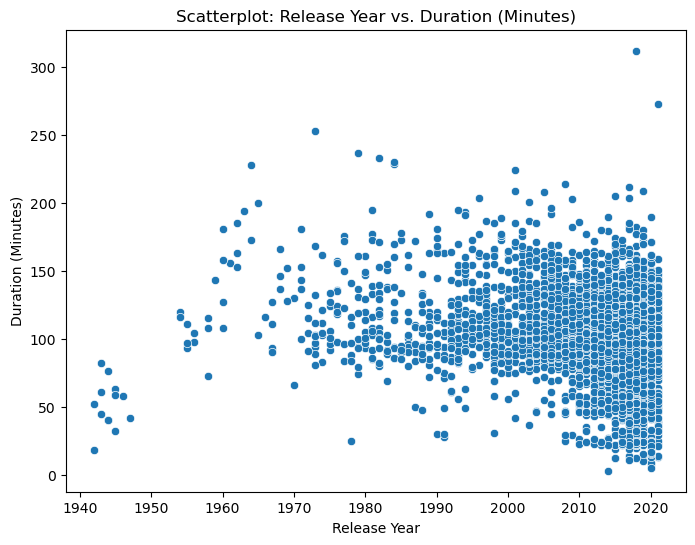

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numeric, x='release_year', y='duration_minutes')
plt.title('Scatterplot: Release Year vs. Duration (Minutes)')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.show()


## Hypothesis:

There is no significant linear relationship between the release year of a movie and its duration in minutes.
In other words, we expect that over the years, the length of Netflix movies hasn’t consistently increased or decreased in a way that shows a strong correlation.

In [6]:
import numpy as np

# Define X and y
X = df_numeric['release_year'].values.reshape(-1, 1)  # Independent variable (must be 2D)
y = df_numeric['duration_minutes'].values.reshape(-1, 1)  # Dependent variable (also 2D)

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (6128, 1)
y shape: (6128, 1)


In [7]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of the splits
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (4902, 1)
Test set size: (1226, 1)


In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the model
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict y values using the test data
y_pred = regressor.predict(X_test)


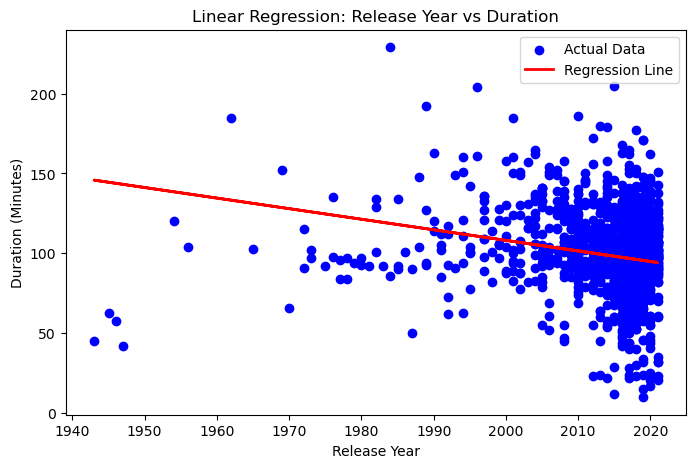

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Release Year vs Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.legend()
plt.show()


## Interpretation of Linear Regression Fit

The regression line appears to have a slight negative slope, suggesting that  more recent Netflix titles tend to have slightly shorter durations.
However, the scatterplot shows a wide spread of data points around the line, especially in recent years (2000–2020). This indicates that the relationship between release year and duration is very weak or possibly insignificant.

Our initial hypothesis stated that the release year of Netflix titles would have a significant relationship with their duration, expecting that title duration may have increased or decreased over time.

However, the linear regression analysis shows no meaningful correlation between release year and duration.
The regression line appears almost flat, and the data points are widely scattered around it, indicating that release year does not significantly predict title duration.

## Conclusion:
Our hypothesis is not supported by the data. Title durations on Netflix have remained relatively independent of their release year, especially in recent decades.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 703.66
R² Score: 0.01


In [14]:
import pandas as pd

# Create a DataFrame comparing Actual vs Predicted
comparison_df = pd.DataFrame({
    'Actual Duration (Minutes)': y_test.flatten(),
    'Predicted Duration (Minutes)': y_pred.flatten()
})

# Display the first 10 rows
comparison_df.head(10)


,Actual Duration (Minutes),Predicted Duration (Minutes)
0,124.0,106.825352
1,60.0,98.228418
2,113.0,100.873629
3,115.0,102.196234
4,103.0,98.228418
5,88.0,95.583208
6,21.0,94.921905
7,135.0,95.583208
8,105.0,114.099681
9,103.0,104.180142


## Model Performance Reflection:

The linear regression model did not perform well on the test set.

    - The R² score of 0.01 means the model explains only 1% of the variance in movie duration, which is extremely poor.

    - The Mean Squared Error (MSE) of ~703 shows large discrepancies between actual and predicted values.

    - The predicted durations are clustered around the same values, regardless of actual movie duration.

## Thoughts on Data Bias and Impact:

One reason for this poor performance could be bias in the dataset:

    - The dataset contains movies from many decades, but most records are from recent years.

    - Duration might not have a direct linear relationship with the release year.

    - Other hidden variables (like genre, production budget, or region) might impact duration but were not included.